In [1]:
!pip install finance-datareader


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 48 kB 3.9 MB/s 


             Open   High    Low  Close    Volume    Change
Date                                                      
2016-01-04  25200  25200  24100  24100    306939 -0.043651
2016-01-05  24040  24360  23720  24160    216002  0.002490
2016-01-06  24160  24160  23360  23500    366752 -0.027318
2016-01-07  23320  23660  23020  23260    282388 -0.010213
2016-01-08  23260  23720  23260  23420    257763  0.006879
...           ...    ...    ...    ...       ...       ...
2022-05-23  68800  68800  67600  67900  13684088 -0.001471
2022-05-24  67500  67700  66500  66500  15482576 -0.020619
2022-05-25  66700  67100  65900  66400  15150490 -0.001504
2022-05-26  66300  67200  65500  65900  15970890 -0.007530
2022-05-27  66700  66900  66200  66500  11346700  0.009105

[1574 rows x 6 columns]
(1574, 6)
Epoch 1/100
84/84 [==============================] - 2s 7ms/step - loss: 0.0181
Epoch 2/100
84/84 [==============================] - 1s 6ms/step - loss: 0.0015
Epoch 3/100
84/84 [===================

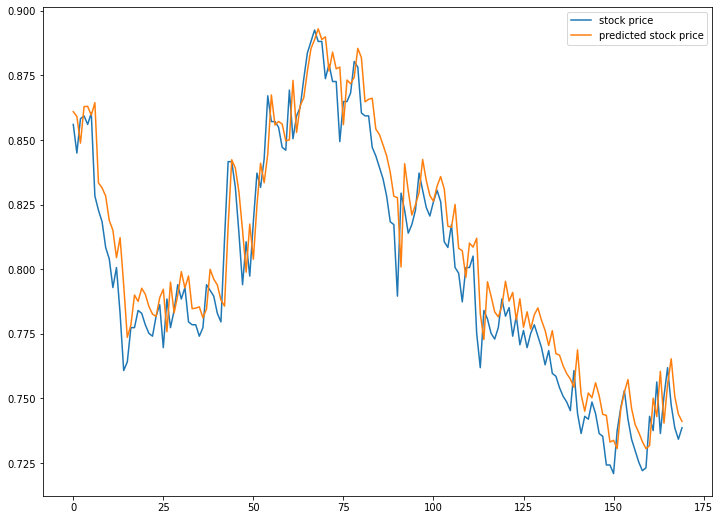

In [4]:
import FinanceDataReader as fdr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

samsung = fdr.DataReader('005930', '2016')
print(samsung)
print(samsung.shape)

openValues = samsung[['Open']]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
scaled = scaler.fit_transform(openValues)

TEST_SIZE = 200
train_data = scaled[:-TEST_SIZE]
test_data = scaled[-TEST_SIZE:]

def make_sample(data, window):
    train = []
    target = []
    for i in range(len(data)-window):
        train.append(data[i:i+window])
        target.append(data[i+window])
    return np.array(train), np.array(target)


X_train, y_train = make_sample(train_data, 30)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(LSTM(16, 
                input_shape=(X_train.shape[1], 1), 
                activation='tanh', 
                return_sequences=False)
          )
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 100, batch_size = 16)

X_test, y_test = make_sample(test_data, 30)
pred = model.predict(X_test)
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9))
plt.plot(y_test, label='stock price')
plt.plot(pred, label='predicted stock price')
plt.legend()
plt.show()

In [5]:
print(samsung.shape)
print(train_data.shape)
print(test_data.shape)
print(X_test.shape)
print(y_test.shape)

(1574, 6)
(1374, 1)
(200, 1)
(170, 30, 1)
(170, 1)


In [6]:
def make_sample_new(data, window):
    test = []
    print()
    for i in range(1):
        test.append(data[-window:])
    return np.array(test)  
scaler.data_max_
X_test_tomorrow
pred_tomorrow
X_test_tomorrow = make_sample_new(test_data, 30)
pred_tomorrow=model.predict(X_test_tomorrow)
print('last 30 days price',X_test_tomorrow*scaler.data_max_)
print('tomorrow price pred',pred_tomorrow*scaler.data_max_)


last 30 days price [[[67200.]
  [66500.]
  [67100.]
  [67000.]
  [67600.]
  [67200.]
  [66500.]
  [66400.]
  [65400.]
  [65400.]
  [65100.]
  [66600.]
  [67400.]
  [68000.]
  [67000.]
  [66300.]
  [65900.]
  [65500.]
  [65200.]
  [65300.]
  [67100.]
  [66600.]
  [68300.]
  [66500.]
  [67800.]
  [68800.]
  [67500.]
  [66700.]
  [66300.]
  [66700.]]]
tomorrow price pred [[67363.10495138]]
